<a href="https://colab.research.google.com/github/michelleah/it-cert-automation-practice/blob/master/ML_Model2_KulinerIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Unzip Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
zip_file = '/content/gdrive/My Drive/Foto_Jajanan.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall()

zip_ref.close()

# **Exploratory Data Analyis (EDA)**

In [4]:
folder_dir = 'Foto Jajanan'
print("Contents of base directory:")
print(os.listdir(folder_dir))

print("\nContents of train directory:")
print(os.listdir(f'{folder_dir}/Train'))

print("\nContents of test directory:")
print(os.listdir(f'{folder_dir}/Test'))

Contents of base directory:
['Test', 'Train']

Contents of train directory:
['Martabak_asin', 'Martabak_Manis', 'Klepon', 'Lapis_legit', 'kue_putri_salju', 'Nastar', 'Kue_lapis_sagu', 'Onde-Onde', 'Serabi', 'Pukis']

Contents of test directory:
['Martabak_asin', 'Martabak_Manis', 'Klepon', 'Lapis_legit', 'kue_putri_salju', 'Nastar', 'Kue_lapis_sagu', 'Onde-Onde', 'Serabi', 'Pukis']


In [5]:
train_dir = os.path.join(folder_dir, 'Train')
test_dir = os.path.join(folder_dir, 'Test')

#Directory of food training images
train_klepon_dir = os.path.join(train_dir, 'Klepon')
train_lapis_sagu_dir = os.path.join(train_dir, 'Kue_lapis_sagu')
train_putri_salju_dir = os.path.join(train_dir, 'kue_putri_salju')
train_lapis_legit_dir = os.path.join(train_dir, 'Lapis_legit')
train_martabak_asin_dir = os.path.join(train_dir, 'Martabak_asin')
train_martabak_manis_dir = os.path.join(train_dir, 'Martabak_Manis')
train_nastar_dir = os.path.join(train_dir, 'Nastar')
train_onde_onde_dir = os.path.join(train_dir, 'Onde-Onde')
train_pukis_dir = os.path.join(train_dir, 'Pukis')
train_serabi_dir = os.path.join(train_dir, 'Serabi')

In [6]:
#Directory of food testing images
test_klepon_dir = os.path.join(test_dir, 'Klepon')
test_lapis_sagu_dir = os.path.join(test_dir, 'Kue_lapis_sagu')
test_putri_salju_dir = os.path.join(test_dir, 'kue_putri_salju')
test_lapis_legit_dir = os.path.join(test_dir, 'Lapis_legit')
test_martabak_asin_dir = os.path.join(test_dir, 'Martabak_asin')
test_martabak_manis_dir = os.path.join(test_dir, 'Martabak_Manis')
test_nastar_dir = os.path.join(test_dir, 'Nastar')
test_onde_onde_dir = os.path.join(test_dir, 'Onde-Onde')
test_pukis_dir = os.path.join(test_dir, 'Pukis')
test_serabi_dir = os.path.join(test_dir, 'Serabi')

In [7]:
train_klepon_filenames = os.listdir(train_klepon_dir)
train_lapis_sagu_filenames = os.listdir(train_lapis_sagu_dir)
train_putri_salju_filenames = os.listdir(train_putri_salju_dir)
train_lapis_legit_filenames = os.listdir(train_lapis_legit_dir)
train_martabak_asin_filenames = os.listdir(train_martabak_asin_dir)
train_martabak_manis_filenames = os.listdir(train_martabak_manis_dir)
train_nastar_filenames = os.listdir(train_nastar_dir)
train_onde_onde_filenames = os.listdir(train_onde_onde_dir)
train_pukis_filenames = os.listdir(train_pukis_dir)
train_serabi_filenames = os.listdir(train_serabi_dir)

In [8]:
test_klepon_filenames = os.listdir(test_klepon_dir)
test_lapis_sagu_filenames = os.listdir(test_lapis_sagu_dir)
test_putri_salju_filenames = os.listdir(test_putri_salju_dir)
test_lapis_legit_filenames = os.listdir(test_lapis_legit_dir)
test_martabak_asin_filenames = os.listdir(test_martabak_asin_dir)
test_martabak_manis_filenames = os.listdir(test_martabak_manis_dir)
test_nastar_filenames = os.listdir(test_nastar_dir)
test_onde_onde_filenames = os.listdir(test_onde_onde_dir)
test_pukis_filenames = os.listdir(test_pukis_dir)
test_serabi_filenames = os.listdir(test_serabi_dir)

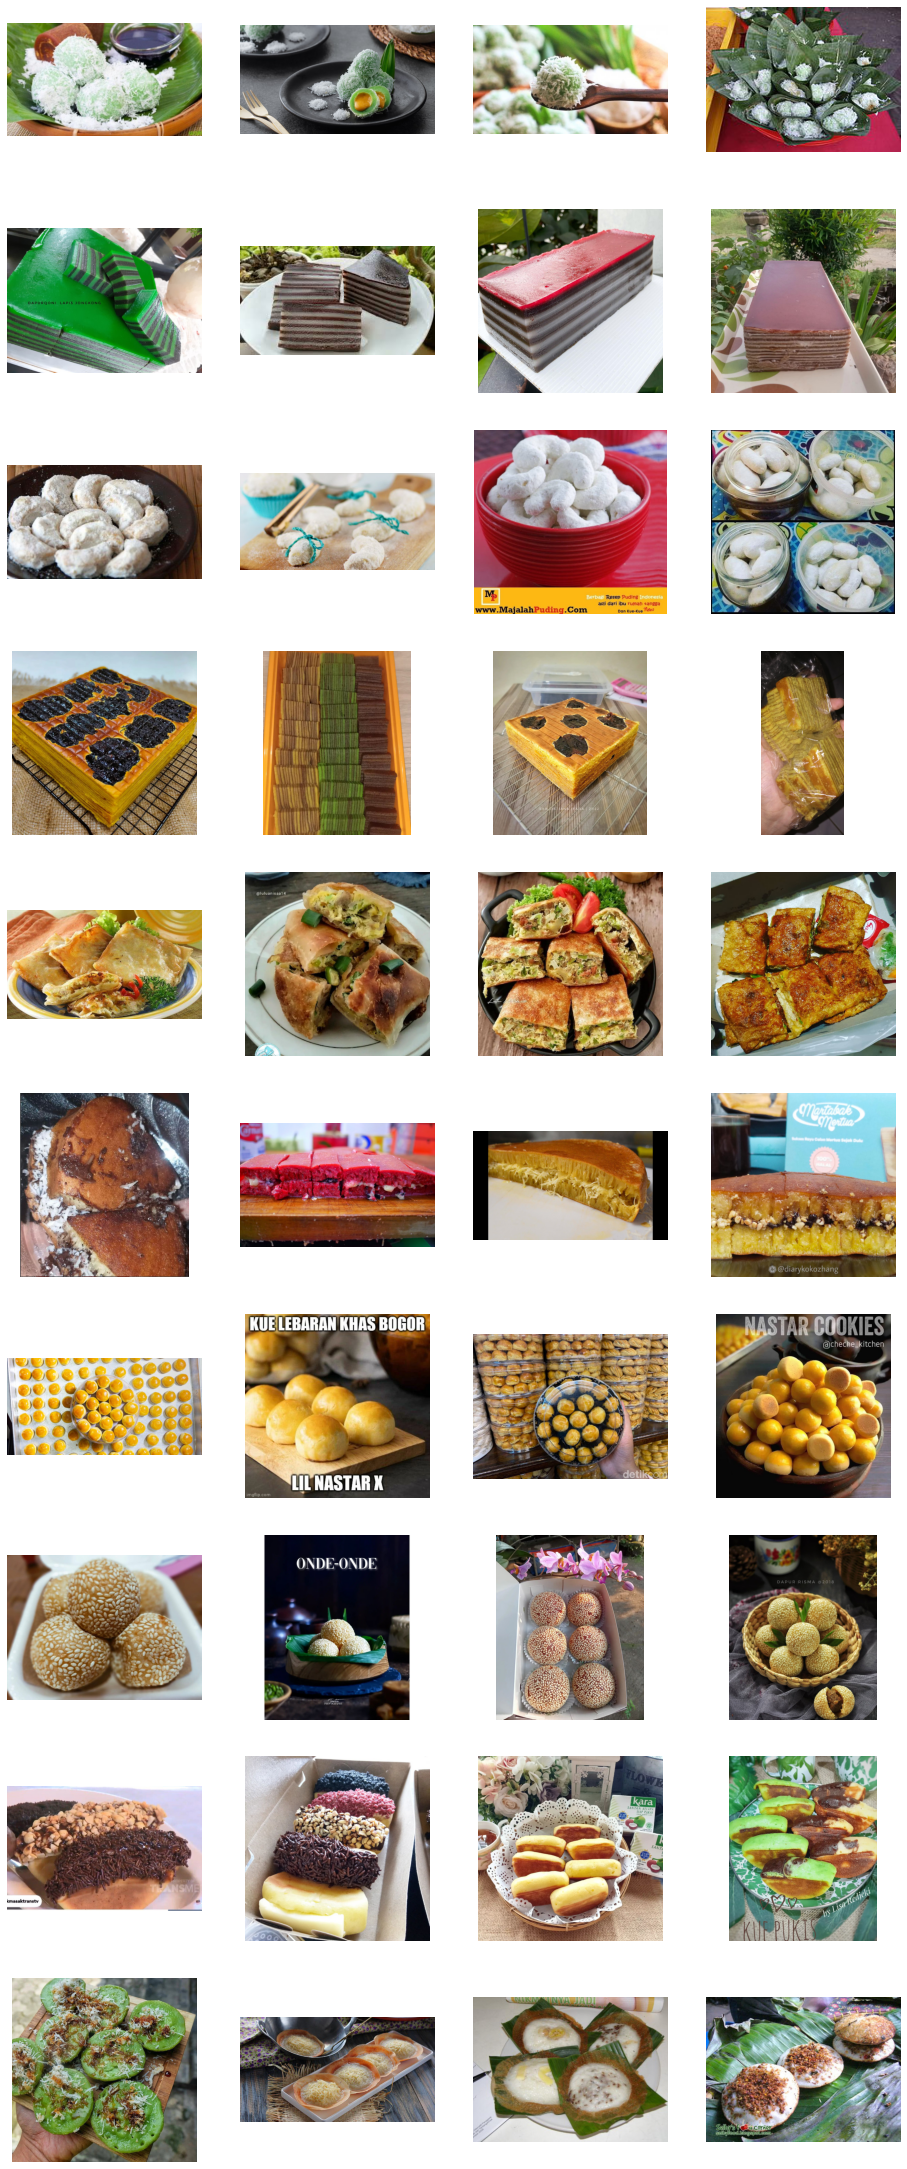

In [9]:
%matplotlib inline

nrows = 10
ncols = 4

pic_index = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_klepon = [os.path.join(train_klepon_dir, filename)
                   for filename in train_klepon_filenames[pic_index-4:pic_index]
                  ]
next_lapis_sagu = [os.path.join(train_lapis_sagu_dir, filename)
                   for filename in train_lapis_sagu_filenames[pic_index-4:pic_index]
                  ]
next_putri_salju = [os.path.join(train_putri_salju_dir, filename)
                   for filename in train_putri_salju_filenames[pic_index-4:pic_index]
                  ]
next_lapis_legit = [os.path.join(train_lapis_legit_dir, filename)
                   for filename in train_lapis_legit_filenames[pic_index-4:pic_index]
                  ]
next_martabak_asin = [os.path.join(train_martabak_asin_dir, filename)
                   for filename in train_martabak_asin_filenames[pic_index-4:pic_index]
                  ]
next_martabak_manis = [os.path.join(train_martabak_manis_dir, filename)
                   for filename in train_martabak_manis_filenames[pic_index-4:pic_index]
                  ]
next_nastar = [os.path.join(train_nastar_dir, filename)
                   for filename in train_nastar_filenames[pic_index-4:pic_index]
                  ]
next_onde_onde = [os.path.join(train_onde_onde_dir, filename)
                   for filename in train_onde_onde_filenames[pic_index-4:pic_index]
                  ]
next_pukis = [os.path.join(train_pukis_dir, filename)
                   for filename in train_pukis_filenames[pic_index-4:pic_index]
                  ]
next_serabi = [os.path.join(train_serabi_dir, filename)
                   for filename in train_serabi_filenames[pic_index-4:pic_index]
                  ]
for i, img_path in enumerate(next_klepon + next_lapis_sagu + next_putri_salju + 
                             next_lapis_legit + next_martabak_asin + next_martabak_manis +
                             next_nastar + next_onde_onde + next_pukis + next_serabi ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Image Augmentation**

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  class_mode='categorical',
                  batch_size= 20)

test_datagen = ImageDataGenerator(rescale=1./255)
                                    
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(150, 150),
                 class_mode='categorical',
                 batch_size= 20)

Found 1996 images belonging to 10 classes.
Found 198 images belonging to 10 classes.


# **Train Model**

In [11]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [12]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
history = model.fit(train_generator,
                    steps_per_epoch= 100,
                    epochs= 80,
                    validation_data= test_generator,
                    validation_steps = 10,
                    verbose = 2)

Epoch 1/80
100/100 - 67s - loss: 2.1666 - accuracy: 0.1969 - val_loss: 1.8633 - val_accuracy: 0.3232 - 67s/epoch - 672ms/step
Epoch 2/80
100/100 - 54s - loss: 1.8153 - accuracy: 0.3146 - val_loss: 1.9490 - val_accuracy: 0.3384 - 54s/epoch - 541ms/step
Epoch 3/80
100/100 - 55s - loss: 1.7302 - accuracy: 0.3637 - val_loss: 1.7709 - val_accuracy: 0.3434 - 55s/epoch - 548ms/step
Epoch 4/80
100/100 - 55s - loss: 1.6517 - accuracy: 0.4083 - val_loss: 1.6465 - val_accuracy: 0.3737 - 55s/epoch - 549ms/step
Epoch 5/80
100/100 - 54s - loss: 1.6202 - accuracy: 0.4138 - val_loss: 1.4294 - val_accuracy: 0.4394 - 54s/epoch - 542ms/step
Epoch 6/80
100/100 - 53s - loss: 1.5521 - accuracy: 0.4374 - val_loss: 1.5929 - val_accuracy: 0.4495 - 53s/epoch - 533ms/step
Epoch 7/80
100/100 - 53s - loss: 1.5138 - accuracy: 0.4554 - val_loss: 1.3935 - val_accuracy: 0.4899 - 53s/epoch - 529ms/step
Epoch 8/80
100/100 - 53s - loss: 1.5000 - accuracy: 0.4724 - val_loss: 1.4388 - val_accuracy: 0.4798 - 53s/epoch - 532

In [14]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])

Saving 006.jpg to 006.jpg
[9.9963653e-01 2.2091290e-06 5.2186283e-10 3.0407816e-04 7.0068805e-11
 2.5127597e-06 2.7616497e-07 2.1056301e-05 5.9891527e-06 2.7305512e-05]
